<a href="https://colab.research.google.com/github/Ammareli/Collab-Notebooks/blob/main/ML_faceREC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import glob as gb
from tqdm import tqdm
import tensorflow as tf

In [ ]:
train_dir='/content/drive/MyDrive/Data Sets/data_rgb'
os.listdir(train_dir)

['Aftab',
 'Ammar',
 'Atiqa',
 'Gulam',
 'Ibrahim',
 'makdoom',
 'Maria',
 'Mohsin',
 'shahzad']

In [ ]:
#defining train data set

Train_Data=tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    rescale=1/255.0,
).flow_from_directory(train_dir,batch_size=16,subset="training",target_size=(224,224),shuffle=False)

Found 5332 images belonging to 9 classes.


In [ ]:
list(Train_Data.class_indices.keys())

['Aftab',
 'Ammar',
 'Atiqa',
 'Gulam',
 'Ibrahim',
 'Maria',
 'Mohsin',
 'makdoom',
 'shahzad']

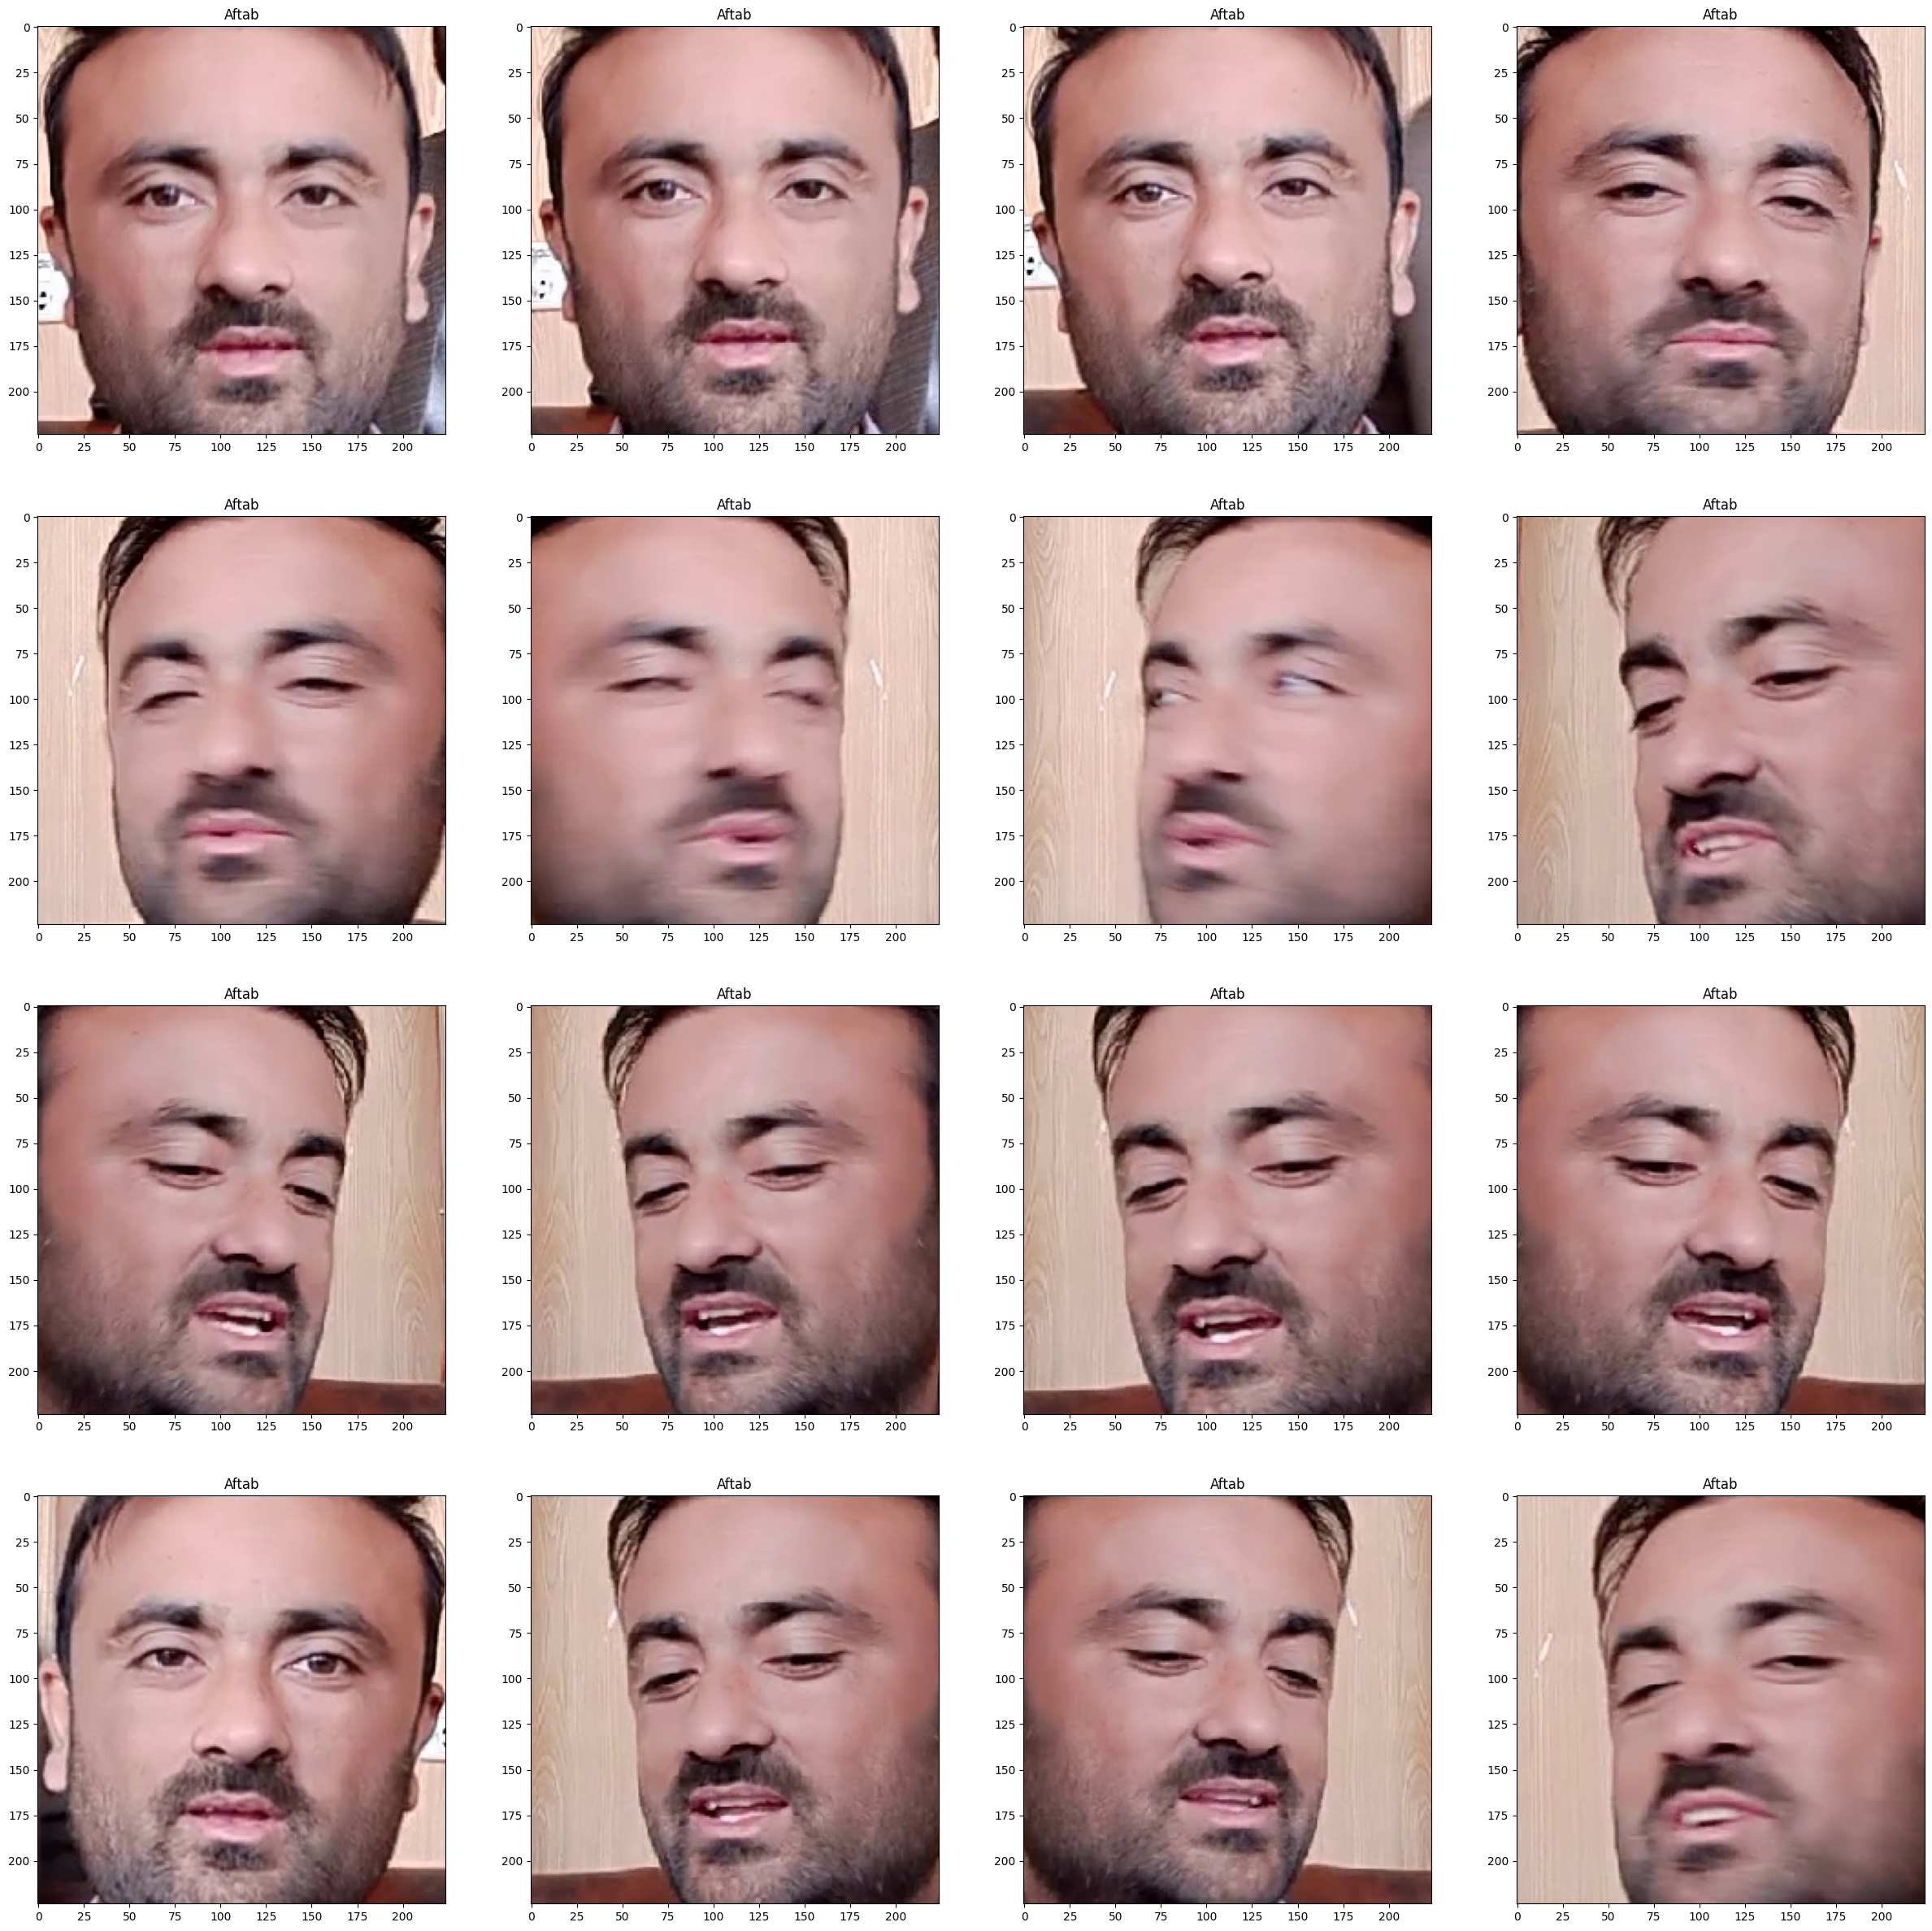

In [ ]:
classes=list(Train_Data.class_indices.keys())
plt.figure(figsize=(30,30))
for X_batch, y_batch in Train_Data:
    # create a grid of 7x7 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model


In [ ]:
import gdown

In [ ]:
url="https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5"
if not os.path.exists("weights"):
  os.makedirs("weights")
output =  "weights/vgg_face_weights.h5"
print("vgg_face_weights.h5 will be downloaded...")
gdown.download(url, output, quiet=False)

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /content/weights/vgg_face_weights.h5
100%|██████████| 580M/580M [00:02<00:00, 193MB/s]


'weights/vgg_face_weights.h5'

In [ ]:
model = vgg_face()

model.load_weights('/content/weights/vgg_face_weights.h5')

In [ ]:
from tensorflow.keras.models import Model
model = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_input (Inpu  [(None, 224, 224, 3)]     0         
 tLayer)                                                         
                                                                 
 zero_padding2d (ZeroPaddin  (None, 226, 226, 3)       0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_1 (ZeroPadd  (None, 226, 226, 64)      0         
 ing2D)                                                          
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                             

In [ ]:
embedding_vector = model.predict(Train_Data,steps=len(Train_Data), verbose=1)

334/334 [==============================] - 1105s 3s/step


In [ ]:
y_train=Train_Data.labels

In [ ]:
np.save('Xdata',embedding_vector)

In [ ]:
np.save('ydata',y_train)

In [ ]:
del embedding_vector
del y_train

In [ ]:
embedding_vector = np.load('Xdata.npy')
y_train = np.load('ydata.npy')

In [ ]:
embedding_vector[0]

array([ 0.01645622, -0.01348193,  0.0039201 , ..., -0.01385685,
        0.01400605,  0.00444421], dtype=float32)

In [ ]:
embedding_vector[500]

array([ 0.01267527, -0.0011218 ,  0.00830945, ..., -0.01520764,
        0.01292232,  0.00023716], dtype=float32)

In [ ]:
embedding_vector[500]

array([ 0.01267527, -0.0011218 ,  0.00830945, ..., -0.01520764,
        0.01292232,  0.00023716], dtype=float32)

In [ ]:
y_train[0]

0

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(embedding_vector,y_train,test_size=0.1,shuffle=True, stratify=y_train,random_state=42)


In [ ]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [ ]:
# Standarize features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape

(4798, 128)

In [ ]:
from sklearn.svm import SVC

clf = SVC(kernel='linear',C=2.,class_weight='balanced',decision_function_shape='ovo',probability=True)
clf.fit(X_train, y_train)

SVC(C=2.0, class_weight='balanced', decision_function_shape='ovo',
    kernel='linear', probability=True)

In [ ]:
y_predict = clf.predict(X_test)

In [ ]:
y_predict[:5]

array([7, 7, 5, 1, 4], dtype=int32)

In [ ]:
# Find the classification accuracy
from sklearn.metrics import accuracy_score
print(f'The Accuracy of VGGFace2 is {accuracy_score(y_test,y_predict)*100} %')

The Accuracy of VGGFace2 is 100.0 %


<Axes: >

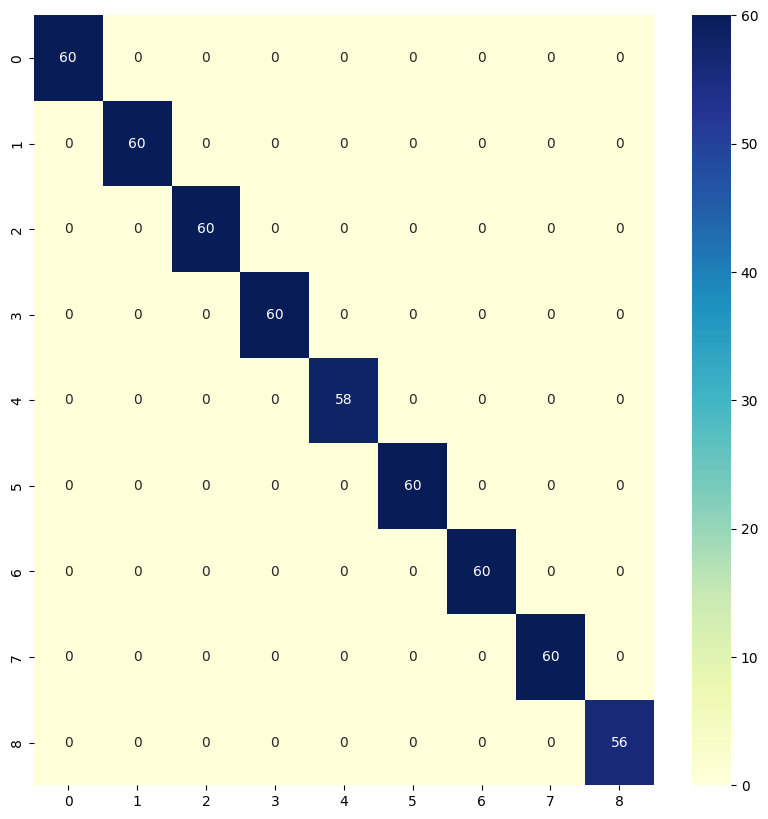

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
plt.figure(figsize=(10,10))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        60
           3       1.00      1.00      1.00        60
           4       1.00      1.00      1.00        58
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00        60
           7       1.00      1.00      1.00        60
           8       1.00      1.00      1.00        56

    accuracy                           1.00       534
   macro avg       1.00      1.00      1.00       534
weighted avg       1.00      1.00      1.00       534



In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_predict_1 = DTC.predict(X_test)

In [ ]:
y_predict_1[:5]

array([7, 7, 5, 1, 4], dtype=int32)

In [ ]:
# Find the classification accuracy
from sklearn.metrics import accuracy_score
print(f'The Accuracy of VGGFace2 is {accuracy_score(y_test,y_predict_1)*100} %')

The Accuracy of VGGFace2 is 99.25093632958801 %


<Axes: >

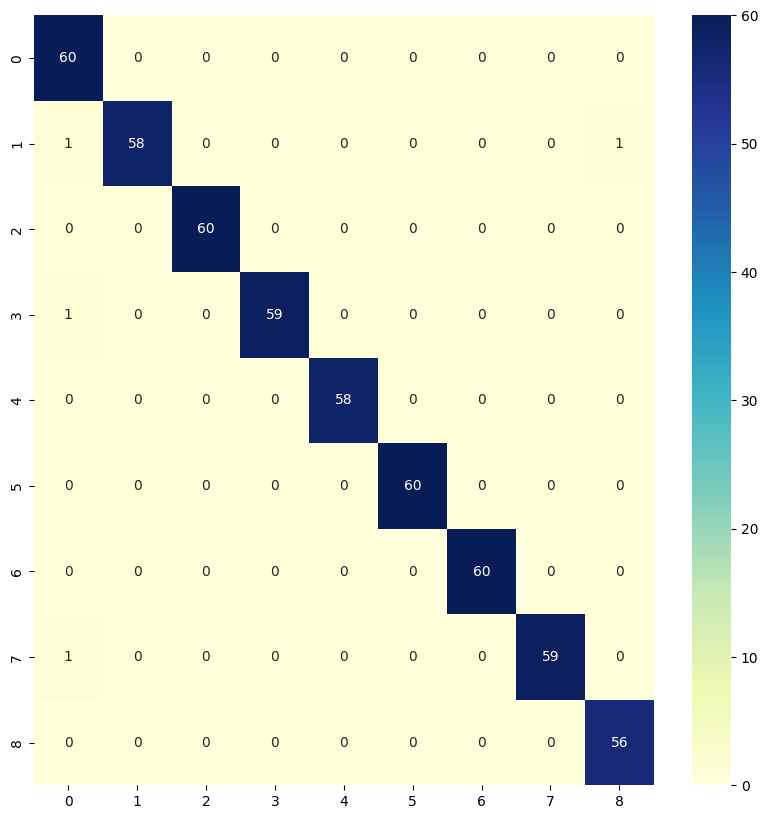

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict_1)
plt.figure(figsize=(10,10))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict_2 = RFC.predict(X_test)

In [ ]:
y_predict_2[:5]

array([7, 7, 5, 1, 4], dtype=int32)

In [ ]:
# Find the classification accuracy
from sklearn.metrics import accuracy_score
print(f'The Accuracy of VGGFace2 is {accuracy_score(y_test,y_predict_2)*100} %')

The Accuracy of VGGFace2 is 100.0 %


<Axes: >

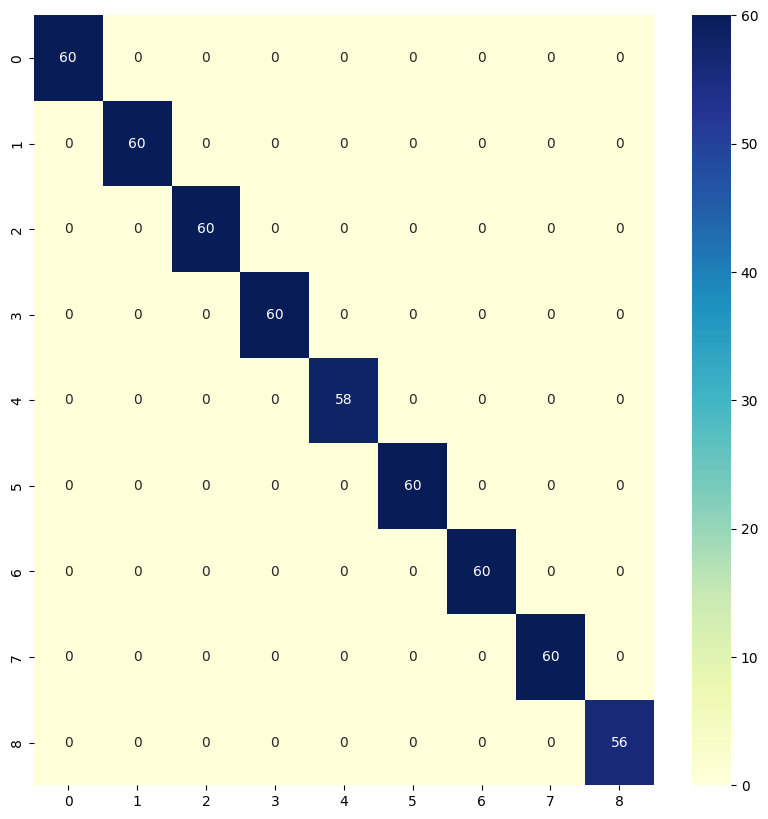

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict_2)
plt.figure(figsize=(10,10))
sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [ ]:
from joblib import dump

In [ ]:
dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [ ]:
dump(pca, 'pca_model.joblib')

['pca_model.joblib']

In [ ]:
dump(clf, 'SVC.joblib')

['SVC.joblib']

In [ ]:
dump(RFC, 'RFC.joblib')

['RFC.joblib']